In [100]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import warnings

In [101]:
data = pd.read_csv('sh_data.csv')
data.sample(5).head(5)

,Unnamed: 0,Text,Language
76,302,വാക്യം നമ്പർ രണ്ട് നിങ്ങൾ‌ ആരെയെങ്കിലും കുറച്ച...,Malayalam
1309,757,சரியான முறையில் சொல் google க்குச் சென்று வார்...,Tamil
1749,647,"எனினும், முக்கியமான அல்லது குழப்பம் விளைவிக்கு...",Tamil
134,325,നിങ്ങൾ ഇവിടെ എന്താണ് ചെയ്യുന്നത് എന്നതുപോലെയാണ...,Malayalam
866,187,"ഇതിലൂടെ കമ്പ്യൂട്ടറുകളെ, നേരിട്ടുള്ള നിർദ്ദേശങ...",Malayalam


In [102]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [103]:
data["Language"].value_counts()

Telugu       600
Malayalam    594
Tamil        469
Kannada      369
Name: Language, dtype: int64

In [104]:
X = data['Text']
X.sample(5)

746     ఒక్కో రైతు వేదిక నిర్మాణంలో కేంద్ర ప్రభుత్వ ని...
690     എന്നാൽ ഇവർക്ക് ഉള്ള ലേഖനങ്ങളിൽ തിരുത്തലുകൾ നടത...
666     [26] எனினும் இதனை மறுத்துரைத்த நேச்சர், தனது த...
314     ಪರೀಕ್ಷೆಯಲ್ಲಿ ಒಂದೇ ಪ್ರಶ್ನೆಗೆ ಉತ್ತರಿಸಲು ಅಥವಾ ನಿಷ...
1003    [72][73] ‘சியாகோமோ பொதேரி’ எனும் ஆய்வாளரின் கண...
Name: Text, dtype: object

In [105]:
Y = data['Language']
Y.sample(5)
Y.head(5)

0    Kannada
1     Telugu
2    Kannada
3      Tamil
4    Kannada
Name: Language, dtype: object

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
Y[0:5]

array([0, 3, 0, 2, 0])

In [107]:
data_list = []
# iterating through all the text
for text in X:
    
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfdif=TfidfVectorizer(norm=None, smooth_idf=False)
X=tfdif.fit_transform(data_list)
columns=tfdif.get_feature_names_out()
X=pd.DataFrame(X.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,2725,2726,2727,2728,2729,2730,2731,2732,2733,2734
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 42)

In [127]:
model = svm.SVC(kernel="linear")

In [128]:
model.fit(x_train, y_train)

SVC(kernel='linear')

In [129]:
y_pred = model.predict(x_test)

In [130]:
from sklearn import metrics

ac = metrics.accuracy_score(y_test,y_pred)
cm = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy:",ac)

Accuracy: 0.905511811023622


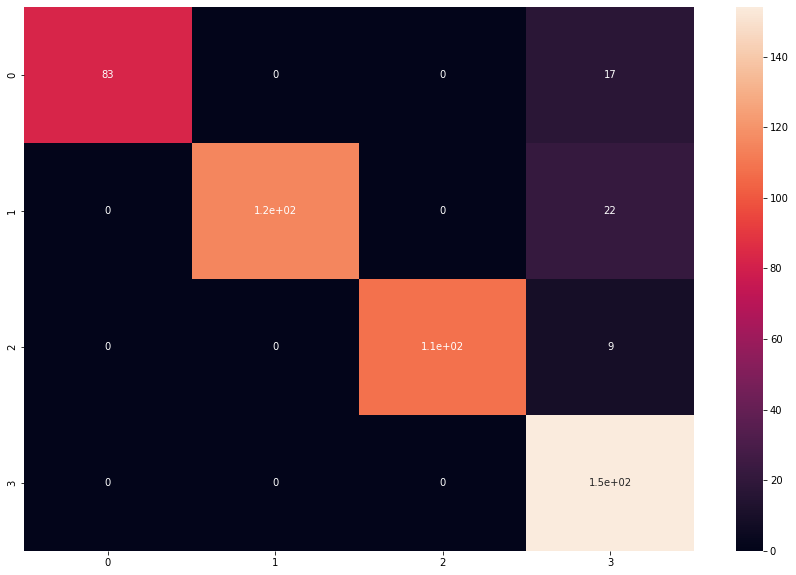

In [131]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [132]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       100
           1       1.00      0.84      0.91       137
           2       1.00      0.92      0.96       117
           3       0.76      1.00      0.87       154

    accuracy                           0.91       508
   macro avg       0.94      0.90      0.91       508
weighted avg       0.93      0.91      0.91       508



In [133]:
def prediction(text):
    X=tfdif.transform([text])
    X=pd.DataFrame(X.toarray())
    lang = model.predict(X) # predicting the language
    lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
    print("The langauge is in",lang[0]) # printing the language

In [134]:
prediction("నా పేరు ప్రణవ్ు")

The langauge is in Telugu


In [135]:
prediction("എന്റെ പേര് പ്രണവ്ు")

The langauge is in Malayalam


In [136]:
prediction("ನನ್ನ ಹೆಸರು ಪ್ರಣವ್")

The langauge is in Kannada


In [137]:
prediction("என் பெயர் பிரணவ்")

The langauge is in Tamil
